/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.3337 - loss: 1.7967 - val_accuracy: 0.5415 - val_loss: 1.2819
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.5543 - loss: 1.2533 - val_accuracy: 0.6078 - val_loss: 1.1179
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.6247 - loss: 1.0695 - val_accuracy: 0.6362 - val_loss: 1.0287
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6558 - loss: 0.9854 - val_accuracy: 0.6553 - val_loss: 0.9888
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.6852 - loss: 0.9027 - val_accuracy: 0.6828 - val_loss: 0.9122
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6860 - loss: 0.9027
Test accuracy: 0.6827999949455261
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report:               precision    recall  f1-score   support

    airplane       0.75      0.71      0.73      1000
  automobile       0.81      0.79      0.80      1000
        bird     

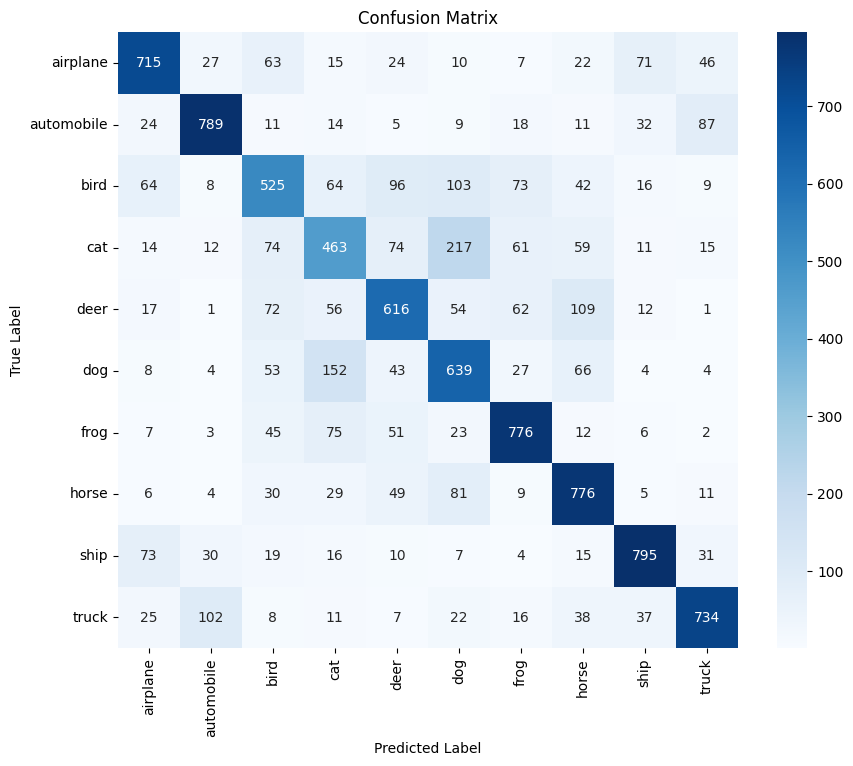

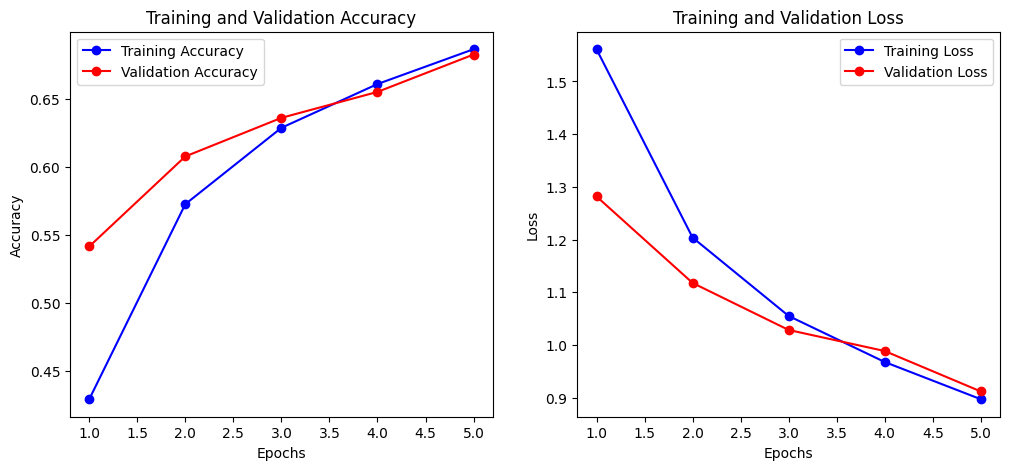

In [2]:
"""
Este código construye y entrena una red neuronal convolucional (CNN) usando el dataset CIFAR-10 con Keras.
Se incluyen métricas adicionales de precisión, reporte de clasificación detallado, y visualización de matriz de confusión
para facilitar la observación de los resultados y evaluación del desempeño del modelo.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)  # Mantener etiquetas categóricas para evaluación

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels_categorical))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f'Test accuracy: {test_acc}')

# Obtener predicciones en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generar reporte de clasificacion
print("Classification Report:", classification_report(test_labels, predicted_labels, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]))

# mostrar matriz de confusion
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Graficar precision y perdida
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
